In [451]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plts

In [483]:
df = pd.read_csv('../../csv/Combined_Data_Frame.csv', index_col=0)
df = df.interpolate()
df = df.iloc[::-1]
df = df.drop(['Wind Speed', 'Air Temperature(Apparent)', 'Air Temperature', 'Cloud Coverage'], axis=1) 
df

,Total Demand
Record Date,
2018-12-31,62108.0
2018-12-30,61282.0
2018-12-29,64849.0
2018-12-28,68179.0
2018-12-27,68436.0
...,...
2021-01-05,78002.0
2021-01-04,75574.0
2021-01-03,67018.0


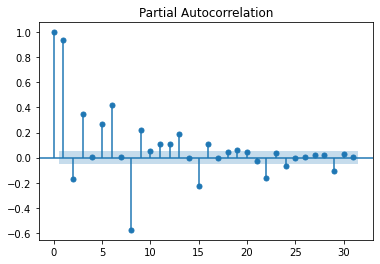

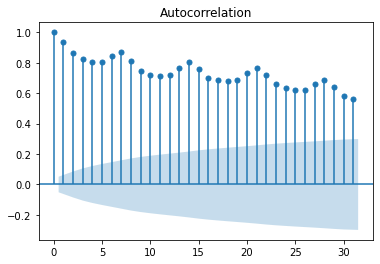

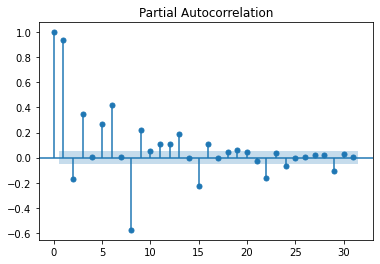

In [484]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df, lags=31)
plot_pacf(df, lags=31)

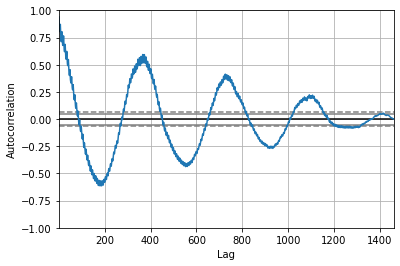

In [454]:
lag_plot = pd.plotting.autocorrelation_plot(df) 
plt.show()

# Model 1a: AR Standard 

In [485]:
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Lag: 23
Coefficients: [ 7.80237781e+02  1.11198425e+00 -3.20456828e-01  1.10658556e-01
 -1.42556897e-02 -5.62943235e-03  2.16831960e-02  3.85142413e-01
 -4.66073840e-01  1.04246925e-01 -3.36681868e-02  4.08147333e-02
 -6.52945242e-02  4.79748080e-02  2.16135965e-01 -2.46777772e-01
  9.69445309e-02 -2.20309820e-02 -1.93080480e-02  1.71637110e-02
  1.40614850e-02  1.93773890e-01 -1.98866103e-01  1.68864802e-02]
predicted=58356.450318, actual=58578.000000
predicted=63623.959046, actual=62131.000000
predicted=65581.565706, actual=65863.000000
predicted=64367.030553, actual=72981.000000
predicted=66153.340341, actual=76413.000000
predicted=67285.781177, actual=72911.000000
predicted=62175.415164, actual=65689.000000
predicted=62759.158091, actual=65028.000000
predicted=66592.623293, actual=67308.000000
predicted=67494.482767, actual=67259.000000
predicted=65538.192795, actual=69617.000000
predicted=66255.303700, actual=73641.000000
predicted=65854.136248, actual=73213.000000
predicted=59326

/Users/daniilsaleksasins/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_

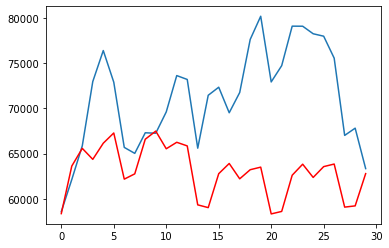

Test RMSE: 9948.671


In [486]:
from statsmodels.tsa.ar_model import AR #This is the autogression model we know from previous iteration

X = df.values #I'm using the second example data here (airline passengers)
train, test = X[1:len(X)-30], X[len(X)-30:] #we predict for ony 30 days for example

# train autoregression
model = AR(train)
model_fit = model.fit()

print('Lag: %s' % model_fit.k_ar) #here we can access the perfect lag to use when we want to finetune other versions of our model
print('Coefficients: %s' % model_fit.params) #here we access the coefficients computed per lag (shift of our time window)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, actual=%f' % (predictions[i], test[i]))

# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

rmse = mean_squared_error(test, predictions, squared=False)
print('Test RMSE: %.3f' % rmse)

# Model 1a: AR Lags

In [457]:
from statsmodels.tsa.ar_model import ar_select_order #we can use this function to select the lags with the most autocorrelation
lags = ar_select_order(train, maxlag=31, seasonal=True, period=12)
print(lags.ar_lags)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


/Users/daniilsaleksasins/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [458]:
from statsmodels.tsa.ar_model import AutoReg #The AutoReg(ression) model is the updated version of the AR model. The mathematical concept is the same, there's just more parameters we can finetune to make the model fit our data better.
auto = AutoReg(train, lags=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], trend="ct", seasonal=True, period=12).fit() #use the lag data we've selected as the ideal lags above, trend indicates whether to look at the trend too or only the constant values (or both)
predictions = auto.predict(start=len(train), end=len(train)+len(test)-1)
for i in range(len(predictions)):
    print('predicted=%f, actual=%f' % (predictions[i], test[i]))
    
rmse = mean_squared_error(test, predictions, squared=False)
print('Test RMSE: %.3f' % rmse)

predicted=56538.869896, actual=53223.000000
predicted=63644.004205, actual=57375.000000
predicted=65730.843994, actual=59291.000000
predicted=65190.422583, actual=61111.000000
predicted=64403.242161, actual=59710.000000
predicted=63950.020724, actual=59519.000000
predicted=59295.026243, actual=56927.000000
predicted=58804.967265, actual=54309.000000
predicted=65924.277444, actual=63016.000000
predicted=67905.432062, actual=67858.000000
predicted=66678.283858, actual=71150.000000
predicted=65456.583557, actual=74195.000000
predicted=64217.686927, actual=75497.000000
predicted=58962.711654, actual=71202.000000
predicted=58340.611932, actual=64785.000000
predicted=65117.643367, actual=68122.000000
predicted=66850.801502, actual=69720.000000
predicted=65314.351486, actual=67236.000000
predicted=63791.539384, actual=66472.000000
predicted=62742.519835, actual=63367.000000
predicted=58108.916365, actual=54745.000000
predicted=57505.939940, actual=52092.000000
predicted=63572.194105, actual=5

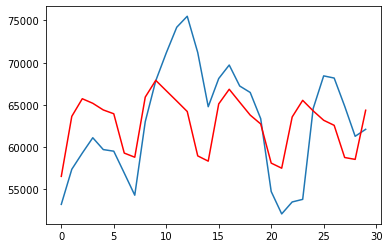

In [459]:
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# AR - EXO

In [476]:
df = pd.read_csv('../../csv/Combined_Data_Frame.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df = df.interpolate()
df = df.iloc[::-1]
df = df.drop(['Air Temperature(Apparent)', 'Cloud Coverage'], axis=1) 
df

,Total Demand,Wind Speed,Air Temperature
Record Date,,,
2018-12-31,62108.0,15.80,4.32
2018-12-30,61282.0,17.58,3.42
2018-12-29,64849.0,14.44,2.04
2018-12-28,68179.0,14.38,2.36
2018-12-27,68436.0,7.42,2.40
...,...,...,...
2021-01-05,78002.0,12.05,-0.14
2021-01-04,75574.0,13.58,0.10
2021-01-03,67018.0,20.20,0.07


In [477]:
period = 14

In [479]:
X = df['Total Demand'].values #this is our target
train, test = X[1:len(X)-period], X[len(X)-period:] #we make a test / train split, using all the other years for training and 1 year for predictions

#here we make the same splits for our extra variables, the length must match the length of our test / train sets!
w = df['Wind Speed'].values
w_train, w_test = w[1:len(w)-period], w[len(w)-period:]

a = df['Air Temperature'].values
a_train, a_test = a[1:len(a)-period], a[len(a)-period:] #with these you can test individual variables

import numpy as np #but we can also add them both to one array and then include (2) at the same time.
array_train = np.array([a_train, w_train])
array_test = np.array([a_test, w_test])

array_train = array_train.reshape((1445, 2)) #make sure to reshape the array, the total length (parameter 1) should match the lenght of the train set, parameter 2 is the amount of variables so 2.
array_test = array_test.reshape((period, 2))

In [480]:
from statsmodels.tsa.ar_model import AR

# train 
model = AR(train)
model_fit = model.fit()

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
# for i in range(len(predictions)):
#     print('predicted=%f, actual=%f' % (predictions[i], test[i]))

/Users/daniilsaleksasins/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_

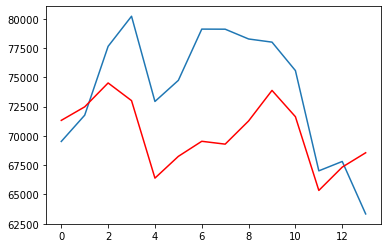

In [481]:
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [482]:
rmse = mean_squared_error(test, predictions, squared=False)
print('Test RMSE: %.3f' % rmse)

Test RMSE: 5668.310


In [466]:
mae = mean_absolute_error(test, predictions)
print('MAE: %.3f' % mae)

MAE: 8453.017


In [467]:
from statsmodels.tsa.ar_model import ar_select_order
lags = ar_select_order(train, maxlag=30, seasonal=False, period=12)
print(lags.ar_lags)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


/Users/daniilsaleksasins/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [468]:
from statsmodels.tsa.ar_model import AutoReg
auto = AutoReg(train, lags=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], trend="t", seasonal=True, exog=array_train, period=12).fit()
predictions = auto.predict(start=len(train), end=len(train)+len(test)-1, exog_oos=array_test)
# for i in range(len(predictions)):
#     print('predicted=%f, actual=%f' % (predictions[i], test[i]))
    
rmse = mean_squared_error(test, predictions, squared=False)
print('Test RMSE: %.3f' % rmse)

Test RMSE: 8055.799


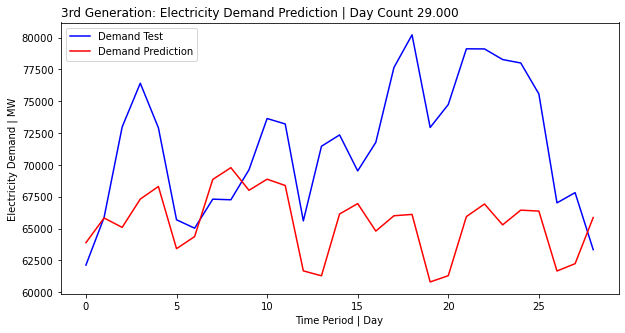

In [469]:
plt.figure(figsize=(10, 5))
plt.title("3rd Generation: Electricity Demand Prediction | Day Count %.3f" % period, loc = 'left')

plt.plot(test, color='blue', label='Demand Test')
plt.plot(predictions, color='red', label = 'Demand Prediction')


plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show()

In [470]:
mae = mean_absolute_error(test, predictions)
print('MAE: %.3f' % mae)

MAE: 6734.690
